In [87]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.optimize as optimize
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy import optimize
import urllib
import frigidum
from frigidum.examples import tsp

## First Task

### Defining Auxiliary Functions

In [88]:
# function used to generat y function of x
def fun(x):
    return (1/( pow(x,2) -3*x + 2 ))

In [89]:
# Approximation fun
def approximation(params,x):
        a, b,c,d = params
        return ((a*x+b)/( pow((x),2) +c*x + d ))

In [90]:
# Mean Suare error with rational approximation
def MLS_rational(params, x,y):
    return sum((y - approximation(params,x))**2)

In [91]:
# Rational approximation for lm method
def rational_lm(params, x,y):
    return ((y - approximation(params,x))**2)

### Initializing

In [92]:
size_of_array = 1001
error =0.001
delta_normal=np.random.rand(size_of_array)    #random samples samples from a standard Normal distribution (mean=0, stdev=1).   
x=[]   #Intializing the x vector
y=[]   #Intializing the y vector
y_clear =[] #Intializing the clear y vector
for k in range(size_of_array):    #According to the proposed formulas, calculating x and y with noise (y), ckear y without noise
    current_x=3*k/1000
    x.append(current_x)
    fun_current=fun(current_x)
    if (fun_current<-100):
        y_clear.append(-100)
        y.append(-100+delta_normal[k])
    elif (fun_current<100):
        y_clear.append(fun_current)
        y.append(fun_current+delta_normal[k])
    else:
        y_clear.append(100)
        y.append(100+delta_normal[k])
x=np.array(x)        #transforming to np.array for future uses.
y=np.array(y)
y_clear=np.array(y_clear)

### Applying minimizing methods

In [93]:
# Levenberg Marquardt algorithm
res_lm = optimize.least_squares(rational_lm, [0.1, 0.1,0.1,0.1], args=(x,y), xtol=error, method='lm')
# Nelder-Mead algorithm
res_nm = optimize.minimize(MLS_rational, [0.1, 0.1,0.1,0.1], args=(x,y), tol=error, method='Nelder-Mead')
# Simulated Annealing algorithm
res_anneal = optimize.dual_annealing(MLS_rational, ((-3, 3), (-3, 3), (-3, 3), (-3, 3)), args=(x,y))
# Differential Evolution algorithm
res_evol = optimize.differential_evolution(MLS_rational, ((-3, 3), (-3, 3), (-3, 3), (-3, 3)), args=(x,y), tol=error)

### saving the numerical results and print them in a table

In [94]:
result=[]
result.append([res_lm.x[0],res_lm.x[1],res_lm.x[2],res_lm.x[3],0,res_lm.nfev,0])
result.append([res_nm.x[0],res_nm.x[1],res_nm.x[2],res_nm.x[3],res_nm.fun,res_nm.nfev,res_nm.nit])
result.append([res_anneal.x[0],res_anneal.x[1],res_anneal.x[2],res_anneal.x[3],res_anneal.fun,res_anneal.nfev,res_anneal.nit])
result.append([res_evol.x[0],res_evol.x[1],res_evol.x[2],res_evol.x[3],res_evol.fun,res_evol.nfev,res_evol.nit])

In [95]:
# Printing a table with results
rowIDs=[ 'Levenberg Marquardt ','Nelder-Mead','Simulated Annealing','Differential Evolution ']
print(tabulate(result, headers=['a','b','c','d','function value','function claculation','num of iteration'],numalign ='center',showindex=rowIDs))

                            a         b         c         d       function value    function claculation    num of iteration
----------------------  ---------  --------  --------  --------  ----------------  ----------------------  ------------------
Levenberg Marquardt     -0.337601  0.338734  -1.97307  0.973306         0                   207                    0
Nelder-Mead             -1.57777   1.57856   -2.00078  1.00083        150231                454                   262
Simulated Annealing     -1.00122   1.00172   -2.00089   1.0009        135708                8771                  1000
Differential Evolution  -1.00738   1.00792   -2.00101  1.00103        135719                7655                  125


### Plotting the results

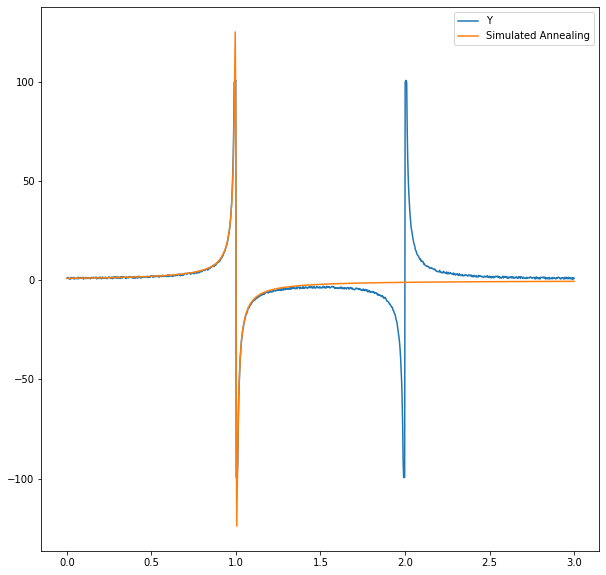

In [96]:
plt.figure(figsize=(10, 10))
plt.plot(x, y)
#plt.plot(x, approximation( res_lm.x,x))
#plt.plot(x, approximation( res_nm.x,x))
#plt.plot(x, approximation( res_anneal.x,x))
plt.plot(x, approximation( res_evol.x,x))
plt.legend(['Y', 'Simulated Annealing'])

#### Plotting each reult individually

## Second Task : Travelling Salesman Problem

In [143]:
# Choosing Dataset and reading it
cities_filename = 'sgb128_dist.txt'
cities_link = 'https://people.sc.fsu.edu/~jburkardt/datasets/cities/sgb128_dist.txt'
urllib.request.urlretrieve(cities_link, cities_filename)
with open(cities_filename) as input_file:
    data = input_file.readlines()
data=np.loadtxt(data)

In [144]:
def random_first_path():
    path=np.arange(0, data.shape[0])
    np.random.seed(15)
    np.random.shuffle(path)
    return path

In [145]:
# Defining a random start
path_first_iteration = random_first_path()

In [146]:
# Finding the Solution
local_opt = frigidum.sa(random_start=random_first_path,
           objective_function=tsp.objective_function,
           neighbours=[tsp.euclidian_bomb_and_fix, tsp.euclidian_nuke_and_fix, tsp.route_bomb_and_fix, tsp.route_nuke_and_fix, tsp.random_disconnect_vertices_and_fix],
           copy_state=frigidum.annealing.naked,
           T_start=10**5,
           alpha=.92,
           T_stop=0.001,
           repeats=10**2,
           post_annealing = None)

T: 0.001, M: 0.00, O_min: 15549.9548, O_current: 15549.9548: 100%|██████████| 221/221 [02:46<00:00,  1.32cooling/s]

---
Neighbour Statistics: 
(proportion of proposals which got accepted *and* changed the objective function)
   euclidian_bomb_and_fix           : 0.242596
   euclidian_nuke_and_fix           : 0.265441
   route_bomb_and_fix               : 0.254562
   route_nuke_and_fix               : 0.274989
   random_disconnect_vertices_and_  : 0.159199
---
(Local) Minimum Objective Value Found: 
   15549.95479324


In [147]:
# printing the results
print('First Iteration Road')
print(path_first_iteration)
print('Final Iteration Road')
print('Solution:', local_opt[0])
print('Min Cost:', local_opt[1])

First Iteration Road
[116  80  59 108  54  97  21 120   8 127  69  55 106  64 115  46  38  11
  87  96 102 125  83  25  30  92   3 103  78  86  36  48  81  67  14  84
  43   9 122 124 113 104  35  20 100  76   6 110  58  13  16  52  90  18
  57  82  74 111  61 114  73  51 101 123   2  33  98  91  94  45  99  24
  88  42  66   7   4 121  95  63  22  40  89  41  70  53  65  50 118  34
  26 126 112   1  49  56 107  79  29  60  77  44  19  37  39 105  68  15
  10  62  32  23  31 109  17  93  47  85  75  71  27  28   0 119   5  12
 117  72]
Final Iteration Road
Solution: [115 103 114 126 125 113 102 101  65  33   0   1   2  35  34  66  67  68
  69  37  36   3   4   5  38  70  71  72  40  39   6   7   8   9  10  11
  44  43  42  41  73  74  75  98  76  77  45  12  13  14  15  16  17  18
  19  20  21  22  55  54  53  85  86  87  88  56  23  24  25  58  57  89
  90  91  92 100  93  94  62  61  60  59  26  27  28  29  30  31  32  64
  63  95  96  97 112 124 123 111 122 110 109 121 120 119 108 1

In [148]:
sum(local_opt[0])

8128

Text(0.5, 1.0, 'First iteration path')

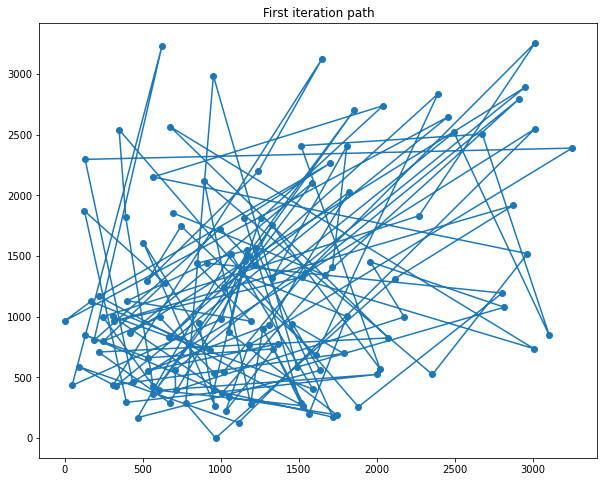

In [149]:
# Plotting first iteration
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0][path_first_iteration], data[:, 1][path_first_iteration], )
plt.plot(data[:, 0][path_first_iteration], data[:, 1][path_first_iteration], )
plt.title('First iteration path')

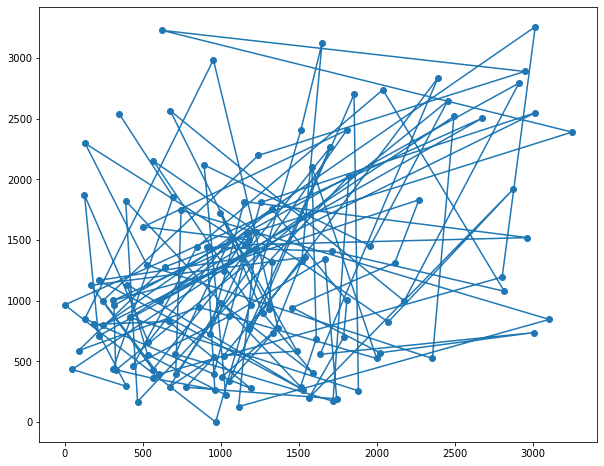

In [150]:
# Plotting final iteration
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0][local_opt[0]], data[:, 1][local_opt[0]])
plt.plot(data[:, 0][local_opt[0]], data[:, 1][local_opt[0]])